<a href="https://colab.research.google.com/github/jku0704/LiT_pbl03/blob/main/PBL03_sample_code_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PBL03 工数予測　サンプルコード

このコードはGoogle Colaboratory用に作成しています。

当サンプルコードは、PBL03のデジタル課題（演習03）において、課題「工数予測結果の誤差が生じることで、機械稼働時間に非稼働時間が生まれている」に対し、工数予測AIモデルの構築と精度検証を目的としたものです。検証の方法論の足掛かりとしてご利用ください。当サンプルコードは以下の流れで構成されています。

コードを順番に実行していけば、一通りの結果が出せるようになっているので、初学者の方はまずはそこからチャレンジてみてください。

1. [前処理](#1)
1. [モデリング](#2)
1. [評価用データに対する予測](#3)
1. [応募用結果ファイルの作成](#4)

使用するデータは以下です。

- readme.md
- sample_submit.csv
- test   フォルダ内のデータ
- train  フォルダ内のデータ

サイトからダウンロードし、Google Driveの直下に「DXQuest_PBL03」というフォルダを作成いただき、当該フォルダ内に当ノートブックおよび上記ファイルを配置してください。なお、以下のようなフォルダ構成を前提としています。

```
# DXQuest_PBL03
│  PBL03_sample_code_1.1.ipynb
│  readme.md
│  sample_submit.csv
│
├─test
│      actual_test.csv
│      base_test.csv
│      processing_test.csv
│
└─train
        actual_train.csv
        base_train.csv
        processing_train.csv
```

⭐️初学者の方へ<br>
わからない単語やエラーメッセージが出た際は、積極的に生成AIを活用してみましょう。

生成AI活用ガイド
https://lifeistech.notion.site/AI-0dc27ac2252342598a46b6948ff2e683?pvs=74

## 0. 初期設定
- まず当ノートブックからデータにアクセスできるようにするため、Google Driveとの連携をします。

In [1]:
# このコードを実行してください（Ctrl + Enter）

# Google Driveに接続できるdriveというモジュールをgoogle.colabというライブラリからインポートする。
from google.colab import drive
# Google Driveにマウント（接続）する。これにより、Colab上でGoogle Drive内のファイルにアクセスできるようになる。
drive.mount('/content/drive')

Mounted at /content/drive



  ⭐️初学者向け解説
  ```
  Google Colaboratoryでファイルを操作する際には、ファイルパスを設定して、プログラムがどこにファイルがあるかを認識できるようにします。
  ファイルパスとは、ファイルが保存されている場所（ディレクトリ）を示す「住所」のようなものです。
  プログラムはこのパスを使ってファイルを読み書きします。
  ```

In [2]:
# このコードを実行してください（Ctrl + Enter）

import os #ファイルの操作ができるライブラリをインポートする

# Google Drive内のデータが置いてある場所をpathに格納する。ここではマイドライブの中の「DXQuest_PBL03」というフォルダを指定している。
path = '/content/drive/MyDrive/DXQuest_PBL03/'

# ## ローカルの場合
# path = "./"

---
#####Google Driveに接続することで、Colab上でGoogle Drive内のファイルにアクセスできるようにしました。<br>さらに、指定したフォルダへのパスを設定することで、Google Drive内のデータを簡単に操作できるようにしました。<br>次のセクションに進みましょう。
---

## 1. 前処理
- まずデータの読み込みと可視化を行うために必要なライブラリをインポートします。<br><br>

  ⭐️初学者向け解説
  ```
  前処理とは、データを本格的に分析・予測する前に行う、データの基本的な理解と整理を目的とした作業です。前分析とも呼ばれ、以下のような内容が含まれます。

  ・データの全体像の把握
  データの大きさ（行数・列数）、各列の内容、データ型などを確認し、データの構造を理解します。

  ・欠損値や異常値の確認
  欠損しているデータや不適切な値（例: 0や負の数など）がないかをチェックします。

  ・データの傾向の把握
  基本統計量の確認やグラフ作成（可視化）を通じて、データの傾向やパターン、ばらつきを理解します。

  ・データのクリーニング
  不要なデータを除去したり、欠損値を補完したりして、データをクリーンにする作業です。

  前処理を行うことで、データの特徴や問題点を把握し、適切なモデリングや予測を行うための準備を整えることができます。
  ```
  ```
  ライブラリとは、すでに用意された便利なツールや機能の集まりです。
  これを使うことで、一からプログラムを作らなくても、難しい作業を簡単に行えるようになります。
  インポートというのは、これらのライブラリをプログラムに「呼び出して使えるようにする」作業です。
  ```

In [3]:
# このコードを実行してください（Ctrl + Enter）

import pandas as pd #表形式のデータを扱うためのライブラリをpdとしてインポートする
import matplotlib.pyplot as plt #グラフを描画するためのライブラリをpltとしてインポートする

### 1-1. データの読み込みと中身の確認

- 基本データ、加工データ、実績データを読み込みます。

In [4]:
# このコードを実行してください（Ctrl + Enter）

# 先ほどpathで指定した場所の中にあるファイルをpandas内にあるread_csvを使って読み込んでいる。
# 読み込んだデータはそれぞれの変数に格納していく。
base_train = pd.read_csv(path + 'train/base_train.csv')
processing_train = pd.read_csv(path + 'train/processing_train.csv')
actual_train = pd.read_csv(path + 'train/actual_train.csv')

<ipython-input-4-f12d277174a4>:5: DtypeWarning: Columns (2,9,15,24,33,34,35,38,39,43,45,46,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  base_train = pd.read_csv(path + 'train/base_train.csv')
<ipython-input-4-f12d277174a4>:6: DtypeWarning: Columns (12,13,15,16,22,23,30,33,34,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,61,63,65) have mixed types. Specify dtype option on import or set low_memory=False.
  processing_train = pd.read_csv(path + 'train/processing_train.csv')


---
#####データを表形式で扱うために、Pandasライブラリをインポートしました。<br>また、グラフを描画するためのライブラリMatplotlibをインポートしました。これにより、データの分析や視覚化が可能になりました。<br>次のセクションに進みましょう。
---

- 次に、それぞれの行数や列数とデータ型などを確認します。<br>
- .info()はPandasデータフレームに対して使われるメソッドで、このメソッドは、データの構造やデータ型、メモリ使用量などを素早く確認したい場合に便利です。<br>
- .info()を実行すると行数・列数、列名とデータ型、非欠損値の数、メモリ使用量が表示されます。<br><br>
  
  ⭐️初学者向け解説
  ```
  .info()メソッドを使う目的は、データの基本的な情報を簡単に確認するためです。具体的には次のことがわかります。

  ・データの大きさ
  何行・何列あるかを確認して、どれくらいのデータを扱うのかを知ることができます。

  ・データの種類
  各列が数字なのか文字なのか、どんなタイプのデータかをチェックします。これによって、データの形式が正しいか確認できます。

  ・欠けているデータ
  どの列にデータが不足している（欠損している）かを見つけて、必要に応じて処理を考えます。

  ・メモリの使用量
  データがどれくらいのメモリを使っているかを確認します。これによって、パソコンに負担がかかりすぎていないかを確認できます。
  ```

In [5]:
# このコードを実行してください（Ctrl + Enter）

base_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16913 entries, 0 to 16912
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   受注番号               16913 non-null  object 
 1   受注日                16913 non-null  object 
 2   製品仕様コード            16912 non-null  object 
 3   受注数量               9394 non-null   float64
 4   実績数量               9273 non-null   object 
 5   下版予定日              9394 non-null   object 
 6   流用受注番号             11530 non-null  object 
 7   流用受注日              11530 non-null  object 
 8   流用製品仕様コード          9258 non-null   object 
 9   頁数                 9373 non-null   object 
 10  キャンペーン番号           9271 non-null   object 
 11  受注キャンペーン番号         9271 non-null   object 
 12  キャンペーンフラグ          9271 non-null   float64
 13  付合受注番号             9271 non-null   object 
 14  付合フラグ              9271 non-null   float64
 15  受注区分               9271 non-null   object 
 16  受注区分名              927

In [6]:
# このコードを実行してください（Ctrl + Enter）

processing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22095 entries, 0 to 22094
Data columns (total 67 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   受注番号       22095 non-null  object 
 1   号機名        22095 non-null  object 
 2   号機コード      22095 non-null  int64  
 3   数量1        22069 non-null  object 
 4   数量項目名1     20527 non-null  object 
 5   数量2        20593 non-null  object 
 6   数量項目名2     7582 non-null   object 
 7   数量3        20592 non-null  object 
 8   数量項目名3     7576 non-null   object 
 9   数量4        14734 non-null  object 
 10  数量項目名4     0 non-null      float64
 11  合計数量       14621 non-null  float64
 12  予備数量       14621 non-null  object 
 13  仕上数量       14621 non-null  object 
 14  連量         8790 non-null   float64
 15  加工数量       14621 non-null  object 
 16  台数         20289 non-null  object 
 17  通し実数       7299 non-null   float64
 18  刷了数        7299 non-null   float64
 19  印刷予備数      7293 non-null   float64
 20  加工予備数 

In [7]:
# このコードを実行してください（Ctrl + Enter）

actual_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110953 entries, 0 to 110952
Data columns (total 37 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   作業実績番号     110953 non-null  object 
 1   作業日        110953 non-null  object 
 2   受注番号       110953 non-null  object 
 3   号機名        110953 non-null  object 
 4   号機コード      110953 non-null  int64  
 5   事業所コード     110952 non-null  float64
 6   部門コード      110952 non-null  float64
 7   工程コード      110953 non-null  int64  
 8   工程名        110953 non-null  object 
 9   得意先コード     110952 non-null  object 
 10  作業者コード     110953 non-null  int64  
 11  工程作業コード    110952 non-null  float64
 12  工程作業名      110952 non-null  object 
 13  工程作業詳細コード  89850 non-null   object 
 14  工程作業詳細名    89850 non-null   object 
 15  作業人数       110953 non-null  int64  
 16  開始時刻       110953 non-null  object 
 17  終了時刻       110952 non-null  object 
 18  所要時間       110952 non-null  float64
 19  作業時間       110953 non-n

---
#####それぞれのデータセットの概要情報（カラム名、データ型、欠損値の有無など）を確認できました。<br>これにより、データの構造や状態を把握し、次の処理に進む準備が整いました。<br>それぞれ行数や列数が多く、データ型も混在していて、欠損値も目立つことが分かります。<br>次のセクションに進みましょう。
---








### 1-2.目的変数の分布の確認

- 目的変数は正味作業時間と付帯作業時間です。これらは実績データの中に存在し、それぞれカラム名は"作業時間"と"合計時間"となります。まずはそれぞれの基本統計量を確認します。<br>
- 基本統計量は、データの中心傾向や散らばり具合、形状などを把握するために使われる統計的な数値のことです。データセットの要約や概要を理解するために非常に役立ちます。<br><br>
  
  ⭐️初学者向け解説
  ```
  基本統計量とは、データの特徴を数値で表したものです。
  たとえば、平均（データの中心）、中央値（真ん中の値）、最大値や最小値、標準偏差（データのばらつき）などがあります。
  これにより、データがどのように分布しているか、またデータの特徴がつかめます。
  基本統計量を確認することで、データの大まかな傾向や異常値の有無を把握し、次のステップであるモデリングや前処理に役立てることができます。
  ```

In [8]:
# このコードを実行してください（Ctrl + Enter）

# actual_trainデータフレームの中で「作業時間」と「合計時間」の2つの列に対して統計的な要約を表示する
actual_train[['作業時間', '合計時間']].describe()

# 統計的な要約には、以下の情報が含まれる:
# - count: データの数（欠損値がないデータの数）
# - mean: 平均値
# - std: 標準偏差（データの散らばり具合）
# - min: 最小値
# - 25%: 第一四分位数（データの下位25%の境界）
# - 50%: 中央値（データの中央の値）
# - 75%: 第三四分位数（データの上位25%の境界）
# - max: 最大値

,作業時間,合計時間
count,110953.000000,110953.000000
mean,39.473687,40.323416
std,165.640433,165.708167
min,0.000000,-30.000000
25%,0.000000,0.000000
50%,7.000000,9.000000
75%,30.000000,30.000000
max,13700.000000,13700.000000


- 作業時間に0や合計時間に負の値の存在が認められますね。ここからデータを整えていきます。

- "作業日"を日付データに変換し、2020-02-04以降の"合計時間"が意味を持つ(付帯作業時間に対応)レコードのみ抽出します。  
- また、評価対象となる"号機名"はグルアー、2号機、4号機、6号機、7号機、8号機です。それらのレコードのみ抽出します。  
- さらに0や負の値などを除外したデータを改めて作成します。.shape は、データフレームや配列の行数と列数を返す属性です。
- これを使うと、- データの構造（データセットがどのくらいのサイズか）を簡単に把握することができます。行数と列数を (行数, 列数) の形式で返します。<br><br>
  
  ⭐️初学者向け解説
  ```
  不正なデータの除外を行うのは、正確なモデル構築のためです。
  作業時間が0や、合計時間が負の値を持つデータは無効なため、これらを除去することで、精度の高いモデル構築が可能になります。
  ```

In [9]:
# このコードを実行してください（Ctrl + Enter）

# '作業日'列を日付形式に変換する（文字列から日付データに変換）
actual_train['作業日'] = pd.to_datetime(actual_train['作業日'])

# '号機名'が特定の機械（'グルアー', '2号機', '4号機', '6号機', '7号機', '8号機'）に該当する行だけをフィルタリングする
actual_filtered = actual_train[actual_train['号機名'].isin(['グルアー','2号機','4号機','6号機','7号機','8号機'])]

# '作業日'が2020年2月4日以降のデータだけをフィルタリングする
actual_filtered = actual_filtered[actual_filtered['作業日'] >= '2020-02-04']

# '作業時間'と '合計時間' の両方が正の値（>0）である行だけをフィルタリングする
actual_filtered = actual_filtered[(actual_filtered['作業時間'] > 0) & (actual_filtered['合計時間'] > 0)]

# フィルタリング後のデータの行数と列数を表示する
print(actual_filtered.shape)

(5899, 37)


---
#####「作業時間」と「合計時間」に関する要約を表示することで、データの基本的な分布や傾向を確認できました。<br>また、特定の条件に絞り、合計時間が正の値であるデータのみを選択することで、分析に適したデータセットが準備できました。
---

- まず正味作業時間の分布を確認してみます。

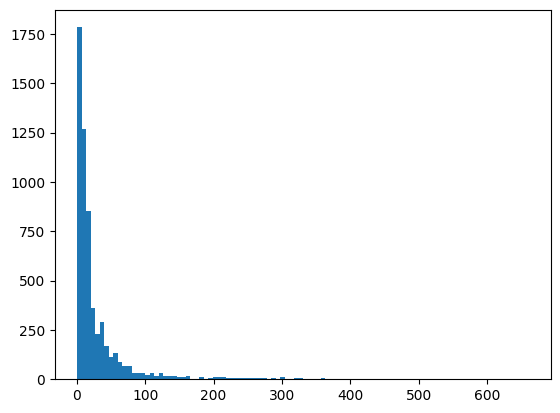

In [10]:
# このコードを実行してください（Ctrl + Enter）

# '作業時間'のデータをヒストグラムで可視化する
# bins=100は、データを100個の区間（ビン）に分けて表示することを意味する
plt.hist(actual_filtered['作業時間'], bins=100)

# ヒストグラムを表示する
plt.show()

- 続いて付帯作業時間の分布を確認してみます。

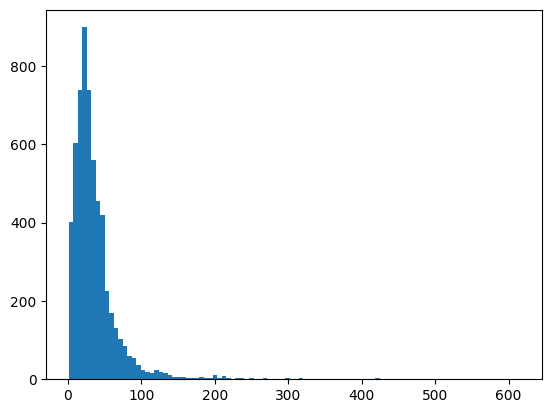

In [11]:
# このコードを実行してください（Ctrl + Enter）

plt.hist(actual_filtered['合計時間'], bins=100)
plt.show()

- 両者ともに形は似ていて、大きく左に寄っていることが分かります。
- 改めて基本統計量も見てみます。

In [15]:
# このコードを実行してください（Ctrl + Enter）

# フィルターをかけたactual_trainデータフレームの中で
# もう一度「作業時間」と「合計時間」の2つの列に対して統計的な要約を表示する
actual_filtered[['作業時間','合計時間']].describe()

,作業時間,合計時間
count,5899.000000,5899.000000
mean,31.038990,36.175623
std,54.915004,35.462492
min,1.000000,1.000000
25%,6.000000,17.000000
50%,13.000000,28.000000
75%,30.000000,44.000000
max,660.000000,615.000000


- 付帯作業時間（合計時間）のほうが比較的長い傾向にあるようです。もう少しデータをフィルタリングしたらまた違った性質が見えてくるかもしれません。
- 色々なフィルタリングの仕方を考え、データを眺めてみましょう。<br><br>
  
  ⭐️初学者向け解説
  ```
  この作業の目的は、データの傾向や特徴をより詳しく理解するためです。ここでは、具体的に次の点が重要です。

  ・付帯作業時間が長い理由の確認
  データをフィルタリングすることで、付帯作業時間が長くなる特定の条件やパターンを見つけ出し、その背後にある原因を明らかにします。

  ・異なるフィルタリング方法でデータの新しい側面を発見
  データをいろいろな方法で絞り込むことで、データの異なる特徴や性質が見えてくる可能性があります。たとえば、特定の期間や条件でフィルタリングすることで、新しい傾向や相関関係が発見できるかもしれません。

  ・予測精度向上のためのデータ探索
  モデルの予測精度を上げるために、適切なデータを見極めることが重要です。フィルタリングを通じて、無駄なデータを取り除き、より予測に役立つデータを絞り込むことができます。

  このように、様々な方法でデータをフィルタリングしながら確認することで、より正確な予測モデル構築に向けた深い洞察を得ることが目的です。
  ```

---
#####「作業時間」と「合計時間」のデータをヒストグラムで可視化することで、両者の分布状況を確認できました。<br>また、フィルタリングされたデータに対して統計的な要約を再表示することで、データの特徴を数値として再確認しました。<br>これにより、データの偏りや傾向を把握することができました。<br>次のセクションに進みましょう。
---

## 2. モデリング
- 続いて、正味作業時間と付帯作業時間を予測するモデルを構築します。

### 2-1.学習データの作成
 - まずはモデルに学習させるデータを作成します。説明変数としては直接作業に影響があると思われる加工データの"数量1"を用いることにします。  
 - まず、目的変数と説明変数が並ぶように加工データと実績データを統合します。キーは"受注番号"と"号機名"です。  
 - また、"合計時間"が意味を持つレコードに絞り、関係する変数のみ抜き出します。

  ⭐️初学者向け解説
  ```
  このセクションでの大事なポイントは下記の通りです。

  ・説明変数と目的変数
  説明変数は、モデルに入力するデータで、予測に使う情報です。
  目的変数は、モデルが予測する対象です。
  例えば、「気温が高いとアイスクリームの売上が増える傾向がある」という仮説に基づいてモデルを構築する場合、
  「気温」が説明変数で、「アイスクリームの売上」が目的変数となります。

 ・説明変数の列と目的変数の列を結合する
  モデルに学習させるために、説明変数（「数量1」など）と目的変数（「合計時間」）を一緒に並んでいないと、学習させることができないためです。

  ・キーによる統合
  「受注番号」と「号機名」という共通のカラム（列）を使って、加工データと実績データを結びつけます。
  これにより、正しい情報が組み合わさり、分析がしやすくなります。

  ・有効なレコードの選別（フィルタリング）
  「合計時間」が有効なデータだけを選びます。
  これにより、無関係なデータを除外し、正確な分析ができます。
  ```

In [16]:
# このコードを実行してください（Ctrl + Enter）

# processing_trainとactual_trainのデータフレームを特定のキー（'受注番号'と'号機名'）に基づいて結合する
# これにより、共通の'受注番号'と'号機名'を持つ行が統合される
train_merged = pd.merge(processing_train, actual_train, on=['受注番号', '号機名'])

# 結合したデータの中から、'作業日'が2020年2月4日以降のデータだけをフィルタリングする
train_merged = train_merged[train_merged['作業日'] >= '2020-02-04']

# 必要な列（'受注番号', '号機名', '作業日', '数量1', '作業時間', '合計時間'）だけを抽出して、新しいデータフレームを作成する
train_data = train_merged[['受注番号', '号機名', '作業日', '数量1', '作業時間', '合計時間']]

 - 評価対象となる"号機名"はグルアー、2号機、4号機、6号機、7号機、8号機なので、"号機名"はそれらに絞ります。"作業時間"や"合計時間"が0や負のレコードも除外します。

In [17]:
# このコードを実行してください（Ctrl + Enter）

# '号機名'が特定の機械（'グルアー', '2号機', '4号機', '6号機', '7号機', '8号機'）に該当する行だけをフィルタリングする
train_data = train_data[train_data['号機名'].isin(['グルアー','2号機','4号機','6号機','7号機','8号機'])]

# '作業時間'と '合計時間' の両方が正の値（>0）である行だけをフィルタリングする
train_data = train_data[(train_data['作業時間'] > 0) & (train_data['合計時間'] > 0)]

# フィルタリング後のデータフレームの概要を表示する
# データの列名、データ型、非欠損値の数、メモリ使用量などが確認できる
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 58 to 22086
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   受注番号    5276 non-null   object        
 1   号機名     5276 non-null   object        
 2   作業日     5276 non-null   datetime64[ns]
 3   数量1     5276 non-null   object        
 4   作業時間    5276 non-null   int64         
 5   合計時間    5276 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 288.5+ KB


- モデルに学習させるデータは数値である必要があります。  
"数量1"には文字列が含まれる(Dtypeがobjectとなっている)ようなので、全て数値データに変換します。

- モデリングを行う際は、データ型を正しい形に修正することがとても大事です。
- astype() 関数は、Pandasで使用されるメソッドで、データフレームやシリーズ内のデータ型を別の型に変換するために使用されます。
- これにより、列のデータ型を整数、浮動小数点数、文字列、ブール型などに変換することができます。<br><br>
  
  ⭐️初学者向け解説
  ```
  ここでは、頻出のデータ型について理解しておきましょう。
  データ型は、プログラムで扱うデータの種類や性質を示します。異なるデータ型には、それぞれ異なる特性や操作方法があります。主要なデータ型には以下のようなものがあります。

  ・整数
  小数点を持たない数値です。例えば、-3、0、7などが整数です。プログラムでは、カウントや順序など、精確な数値が必要なときに使います。

  ・浮動小数点数
  浮動小数点数は、小数点を含む数値です。
  例えば、3.14、-0.001、2.71828などが浮動小数点数です。計算の精度が重要な場合などに使用されます。

  ・文字列
  文字の並びで構成されたデータ型です。例えば、「Hello, World!」などが文字列です。
  テキストデータや情報を表現するために使います。

  ・ブール型
  真偽値を表すデータ型で、True（真）またはFalse（偽）の2つの値しか取れません。
  条件分岐などでよく使用され、データが特定の条件を満たすかどうかを判断します。
  ```

In [18]:
# このコードを実行してください（Ctrl + Enter）

# '数量1'列のデータ型を浮動小数点数（float）に変換する
# これにより、文字列ではなく、小数点を含む数値として扱えるようになる
train_data['数量1'] = train_data['数量1'].astype(float)

# 変更後のデータフレームの概要を表示する
# データ型が正しく変換されたか、他の基本情報（列名、非欠損値の数など）も確認できる
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 58 to 22086
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   受注番号    5276 non-null   object        
 1   号機名     5276 non-null   object        
 2   作業日     5276 non-null   datetime64[ns]
 3   数量1     5276 non-null   float64       
 4   作業時間    5276 non-null   int64         
 5   合計時間    5276 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 288.5+ KB


---
#####「受注番号」と「号機名」に基づいてデータを結合し、共通の情報を統合し必要なデータをフィルタリングしました。<br>さらに「数量1」のデータを数値のデータ型に変換しました。<br>これによりデータの統合とクリーニングが完了し、モデルの学習に進む準備が整いました。<br>次のセクションに進みましょう。
---

### 2-2.モデルの学習

- 作成した学習データで説明変数が"数量1"で目的変数が正味作業時間と付帯作業時間となるようなモデルを学習させます。今回は線形回帰モデルを用います。<br><br>
  
  ⭐️初学者向け解説
  ```
  ・線形回帰モデルとは
  線形回帰モデルは、データの説明変数と目的変数の関係を直線で表現する手法です。
  説明変数と目的変数の間に線形の関係があると仮定し、その関係を使って予測を行います。
  例えば、「気温が高いとアイスクリームの売上が増える傾向がある」という仮説に基づいてモデルを構築する場合、
  「気温」が説明変数で、「アイスクリームの売上」が目的変数となります。

  ・線形回帰モデルのメリット
  シンプルさ: 線形回帰は最も基本的でシンプルなモデルです。実装や解釈が簡単です。
  解釈しやすさ: モデルの係数が説明変数と目的変数の関係を直線で示すため、結果の解釈が容易です。
  計算効率: 計算が比較的軽量であり、データが大規模でもスムーズに動作します。
  ```

In [19]:
# このコードを実行してください（Ctrl + Enter）

# 機械学習モデルを構築するためのscikit-learnライブラリの線形回帰モデルをインポートする
from sklearn import linear_model

# 線形回帰モデルを使うための準備をする
# ここで、線形回帰というモデルを「regr」という名前で使えるように設定する
# この「regr」を使ってデータに基づいた予測を行うことができるようになる
regr = linear_model.LinearRegression()

In [20]:
# このコードを実行してください（Ctrl + Enter）

#linear_model には、線形回帰を含む多くの線形モデルの実装が含まれています。
from sklearn import linear_model

#ここで LinearRegression クラスを呼び出して、regr という変数に線形回帰モデルを作成しています。
#この regr という変数が、線形回帰モデルを使ったトレーニングや予測に使われます。
#regr は regression（回帰）の短縮形として使われているだけで、変数名に特に決まりはありません。これは一般的にコードを書いている人がわかりやすいように任意で付けている名前です。
regr = linear_model.LinearRegression()

- 学習データから改めて学習用と検証用のデータを作成します。  
- "作業日"が2020-06-01以前を学習用、以降を検証用とします<br><br>
  
  ⭐️初学者向け解説
  ```
  学習用データ（モデルを訓練するためのデータ）と検証用データ（訓練されたモデルの性能を評価し、調整するためのデータ）を分けることで、モデルの性能を評価し、過学習を防ぐためです。
  具体的には以下の目的があります。

  ・モデルの評価:
  学習用データでモデルを訓練し、検証用データでその性能を評価します。
  これにより、モデルが新しいデータに対してどれだけ正確に予測できるかを確認します。
  
  ・過学習の防止:
  モデルが学習データに過度に適合しすぎると、検証用データでの性能が低下します。
  例えば、試験問題対策でたくさんの問題集を解いた結果、問題集に出てくる問題の解答は完璧にできるようになったが、試験で出る新しい問題には全く答えられない、という状況が過学習です。
  データを分割することで、モデルが過学習するリスクを軽減します。
  
  ・一般化能力の確認:
  学習用データだけでなく、未見のデータ（検証用データ）でのパフォーマンスを確認することで、モデルが一般的なデータに対しても適切に予測できるかを評価します。
  ```

In [21]:
# このコードを実行してください（Ctrl + Enter）

# '作業日'が2020年6月1日より前のデータを学習用データ（train_all）として抽出する
train_all = train_data[train_data['作業日'] < '2020-06-01']

# '作業日'が2020年6月1日以降のデータを検証用データ（val_all）として抽出する
val_all = train_data[train_data['作業日'] >= '2020-06-01']

- 学習用でモデルを学習させます。

In [22]:
# このコードを実行してください（Ctrl + Enter）

# 線形回帰モデルに先ほどの学習用データを用いて学習を行う
regr.fit(train_all[['数量1']], train_all[['作業時間', '合計時間']])

LinearRegression()

---
#####線形回帰モデルを設定し、2020年6月1日以前のデータを使ってモデルを学習させました。<br>また、2020年6月1日以降のデータをモデルの性能検証用に準備し、データに基づいた予測を行う準備が整いました。<br>次のセクションに進みましょう。
---

### 2-3.モデルの精度評価

- 検証用でモデルの精度を確認します。  
- 今回はMAE(mean absolute error)により正味作業時間("作業時間")と付帯作業時間("合計時間")の精度を評価します。

- MAE（Mean Absolute Error, 平均絶対誤差）は、回帰モデルの予測精度を評価する指標の一つで、予測値と実際の値（真値）の誤差の平均を計算したものです。値が小さいほど予測精度が高いことを意味します。<br>
- MAEは、モデルの予測精度を評価する上でよく使われる指標の一つで、特にデータのばらつきや外れ値が大きくない場合に有効です。

In [23]:
# このコードを実行してください（Ctrl + Enter）

# NumPyライブラリをインポートする。数値計算を効率的に行うためのツールを提供するライブラリ
import numpy as np

# 学習済みの線形回帰モデルを使って、検証データ（val_all）に対する予測値を計算する
# ここでは、'数量1'を使って予測を行う
y_hat = regr.predict(val_all[['数量1']])

# モデルが予測した作業時間（正味作業時間）と実際の作業時間との差の絶対値を計算し、その平均（MAE: Mean Absolute Error）を表示する
# MAEはモデルの予測精度を評価する指標で、値が小さいほど予測が正確であることを示す
print('正味作業時間のMAE:', np.abs(val_all['作業時間'] - y_hat[:, 0]).mean())

# モデルが予測した合計時間（付帯作業時間）と実際の合計時間との差の絶対値を計算し、その平均（MAE）を表示する
print('付帯作業時間のMAE:', np.abs(val_all['合計時間'] - y_hat[:, 1]).mean())

正味作業時間のMAE: 9.952812099542541
付帯作業時間のMAE: 18.54542886954304


- 予実プロット（モデルが予測した値と実際の値を比較するためのグラフ）を作成してみます。まずは正味作業時間です。

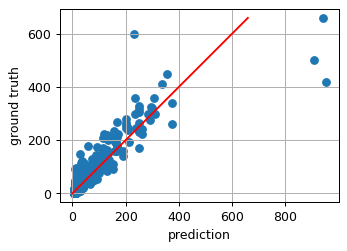

In [24]:
# このコードを実行してください（Ctrl + Enter）

fig, ax = plt.subplots(figsize=(4, 4), dpi=90)  # 図と軸を作成し、図のサイズと解像度を設定

ax.set_xlabel('prediction', fontsize=10)  # x軸のラベルを設定し、フォントサイズを指定
ax.set_ylabel('ground truth', fontsize=10)  # y軸のラベルを設定し、フォントサイズを指定

ax.set_yscale("linear")  # y軸のスケールを線形に設定

# 赤い線を描画し、予測値と実際の値を比較するための基準線とする
ax.plot([i for i in range(int(val_all['作業時間'].max()))],
        [i for i in range(int(val_all['作業時間'].max()))], color='red')

ax.scatter(y_hat[:,0], val_all['作業時間'])  # 予測値と実際の作業時間を散布図でプロット

ax.grid()  # グリッド線を表示

ax.set_aspect('equal')  # 軸のスケールを同じにする（正方形に近いプロットを作成）

plt.show()  # グラフを表示

- 赤い線に近い点が多ければ多いほど精度が高いことを表します。そこそこ当てられているようです。

- 続いて付帯作業時間です。

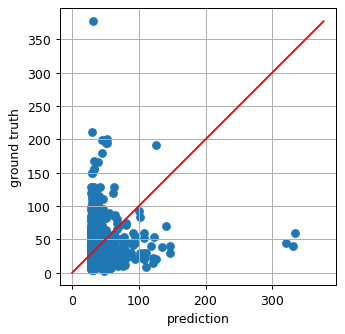

In [25]:
# このコードを実行してください（Ctrl + Enter）

fig, ax = plt.subplots(figsize=(4, 4), dpi=90)  # 図と軸を作成し、サイズと解像度を設定

ax.set_xlabel('prediction', fontsize=10)  # x軸のラベルを設定
ax.set_ylabel('ground truth', fontsize=10)  # y軸のラベルを設定

ax.set_yscale("linear")  # y軸を線形スケールに設定

# 基準線を描画し、予測値と実際の値を比較
ax.plot([i for i in range(int(val_all['合計時間'].max()))],
        [i for i in range(int(val_all['合計時間'].max()))], color='red')

ax.scatter(y_hat[:,1], val_all['合計時間'])  # 散布図をプロット

ax.grid()  # グリッドを表示
ax.set_aspect('equal')  # 軸のスケールを同じに設定

plt.show()  # グラフを表示

- 付帯作業時間は当てるのが難しそうです。

- 余裕がある方は他の機械学習モデルを試してみましょう。<br><br>

  ⭐️初学者向け解説
  ```
  いろいろなモデルを試すことで、どのモデルが最も正確にデータを予測できるかを見つけることができます。
  たとえば、線形回帰だけでなく、決定木やサポートベクターマシン（SVM）なども試してみると、予測精度が向上することがあります。
  今回は必須ではありませんが、もっと学びを深めたい方は、コミュニティ上で経験者の人に聞いてみましょう。
  ```


---
#####学習済みの線形回帰モデルを使って、検証データに基づく作業時間と合計時間の予測を行いました。<br>予測と実際の値との差（MAE: Mean Absolute Error）を計算し、モデルの予測精度を評価しました。MAEは予測の誤差を示し、値が小さいほどモデルの精度が高いことを意味します。<br>また、作業時間と合計時間について、予測値と実際の値を散布図で可視化し、モデルのパフォーマンスを視覚的に確認しました。<br>次のセクションに進みましょう。
---

## 3. 評価用データに対する予測

- 学習したモデルを用いて、評価用データに対して正味作業時間と付帯作業時間を出力します。  
- まず作成した学習用データと同様の評価用データを作成します。

In [26]:
# このコードを実行してください（Ctrl + Enter）

processing_test = pd.read_csv(path + 'test/processing_test.csv')  # テスト用のprocessing_test.csvファイルを読み込む
actual_test = pd.read_csv(path + 'test/actual_test.csv')  # テスト用のactual_test.csvファイルを読み込む
test_merged = pd.merge(actual_test, processing_test)  # 読み込んだ2つのデータフレームを結合する

test_data = test_merged[['index','受注番号','号機名','数量1']]  # 必要な列だけを抽出して新しいデータフレームを作成

test_data.info()  # データフレームの基本情報を表示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   5983 non-null   int64  
 1   受注番号    5983 non-null   object 
 2   号機名     5983 non-null   object 
 3   数量1     5983 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 187.1+ KB


- "数量1"が数値データ(Dtypeがfloat、浮動小数点数のデータ型)となっていることが確認できます。  
- 作成したデータに対して予測を行います。

In [27]:
# このコードを実行してください（Ctrl + Enter）

# 学習済みの線形回帰モデルを使って、テストデータの'数量1'列に基づいて予測を行う
y_hat = regr.predict(test_data[['数量1']])

---
#####テストデータを読み込み、加工データと実データを結合し、必要な列を抽出して新しいデータフレームを作成しました。<br>その後、学習済みの線形回帰モデルを使って、テストデータの「数量1」に基づく予測を行いました。これにより、テストデータに対する予測が完了しました。<br>次のセクションに進みましょう。
---

## 4. 提出用結果ファイルの作成

- 得られた結果を提出用ファイルのフォーマットに合わせます。フォーマットは以下のようにします。  

|index|正味作業時間|付帯作業時間|
|----|----|----|
|0|予測0_0|予測1_0|
|...|...|...|
|5982|予測0_5982|予測1_5982|

In [28]:
# このコードを実行してください（Ctrl + Enter）

# 予測結果をもとに、新しいデータフレームを作成する
# 'index'列にはテストデータのインデックス、'正味作業時間'と'付帯作業時間'には予測結果を格納する
submit = pd.DataFrame({'index': test_data['index'], '正味作業時間': y_hat[:, 0], '付帯作業時間': y_hat[:, 1]})

---
#####予測結果を基に、新しいデータフレームを作成し、テストデータのインデックスと予測された「正味作業時間」および「付帯作業時間」を格納しました。これにより、モデルの予測結果がまとめられたデータが完成しました。
---

- 提出フォーマットではヘッダー（1行目）はなしなので、含まないように注意します。また、DataFrameが持っているindexも除外する必要があります(4列のデータになってしまうため)。<br><br>
  
  ⭐️初学者向け解説
  ```
  DataFrameの「index」は、行を識別するためのラベルです。例えば、データの各行に番号や名前が付けられている部分です。
  インデックスは行を特定するために使われますが、データの内容としては不要な場合があります。
  ファイルに保存する際にインデックスを除外することで、正しいデータだけを取り扱うことができます。
  ```

In [29]:
# このコードを実行してください（Ctrl + Enter）

# 作成したデータフレームをCSVファイルとして保存する
# ファイル名は'IDXXXXXX_PBL03_verXX.csv'とし、インデックスとヘッダーを含まない設定で保存する
submit.to_csv(path + 'IDXXXXXX_PBL03_verXX.csv', index=None, header=False)

---
#####予測結果が格納されたCSVファイルを「IDXXXXXX_PBL03_verXX.csv」という名前で保存することができました。<br>ファイルを識別するためにファイル名を変更しておきましょう。<br>(例：ID123456_PBL03_ver1.csv)<br>まだこれまでに一度も提出していない方は、こちらのファイルを一回目の投稿としてAIモデル精度評価サイトに提出しましょう。<br>
---
###AIモデル精度評価サイト　https://pbl-eval.life-is-tech.com/